<h2> Multiple Linear Regression:


<h7>We have been given a fuel combustion dataset which contain model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
    We will create  a multiple linear regression model using some of these features to predict CO2 emissions of unobserved cars based on the selected features.

In [1]:
# Installing required libraries;
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

#importing the libraries;
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 6.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.9 MB 6.4 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.9 MB 6.5 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.9 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.9 MB 5.9 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/12.9 MB 4.8 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.9 MB 4.5 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/12.9 MB 4.3 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.9 MB 4.2 MB/s eta 0:00:02
   -------------------------- ------------- 8.7/12.9 MB 4.2 MB/s eta 0:00:02
   ------------------------------ --------- 9.7/12.9 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 4.3 MB/s eta 0:00:01
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/ff/87/788da20cfefcd261123d4bb015b2de076e49cdd3b811b55e6811acd3cb21/scikit_learn-1.6.0-cp310-cp310-win_amd64.whl.metadata (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x000001D13A149BD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/7.8 MB 2.2 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/7.8 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 2.5 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 2.7 MB/s eta 0:00:02
   ------------------------ --------------- 4.7/7.8 MB 2.9 MB/s eta 0:00:02
   ----------------------------- ---------- 5.8/7.8 MB 3.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling 


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#loading the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
134,2014,BMW,X6 xDRIVE50i,SUV - STANDARD,4.4,8,A8,Z,16.4,11.3,14.1,20,324
406,2014,FORD,FOCUS FFV,COMPACT,2.0,4,M5,E,11.9,8.9,10.6,27,170
756,2014,MERCEDES-BENZ,GL 350 BLUETEC 4MATIC,SUV - STANDARD,3.0,6,AS7,D,13.4,10.2,12.0,24,324
78,2014,BMW,320i xDRIVE,COMPACT,2.0,4,A8,Z,10.2,7.0,8.8,32,202
903,2014,PORSCHE,PANAMERA 4S,FULL-SIZE,3.0,6,AM7,Z,13.4,8.8,11.3,25,260


In [3]:
# lets create general summary statistics of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [6]:
#Find correlation between target variable 
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Look at the bottom row, which shows the correlation between each variable and the target, 'CO2EMISSIONS'. Each of these shows a fairly high level of correlation, each exceeding 85% in magnitude. Thus all of these features are good candidates.

Next, examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, we can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

Notice that FUELCONSUMPTION_COMB and FUELCONSUMPTION_COMB_MPG are not perfectly correlated. They should be, though, because they measure the same property in different units. In practice, you would investigate why this is the case. We might find out that some or all of the data is not useable as is.

In [7]:

df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [8]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


To help with selecting predictive features that are not redundant, consider the following scatter matrix, which shows the scatter plots for each pair of input features. The diagonal of the matrix shows each feature's histogram.

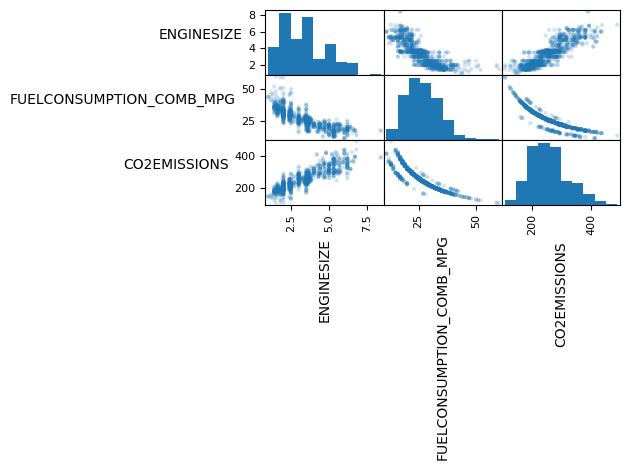

In [9]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()
    

In [10]:
#Extracting the required columns and converts the resulting dataframe to numpy arrays
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [11]:
#Standardizing the data , so the model doesnot inadvertently favour any feature due to its magnitude
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [12]:
#Confirming that mean is zero and standard deviation is 1
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [13]:
#splitting the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [14]:
#Building A Multiple Linear Regression model;
# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [15]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)


Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


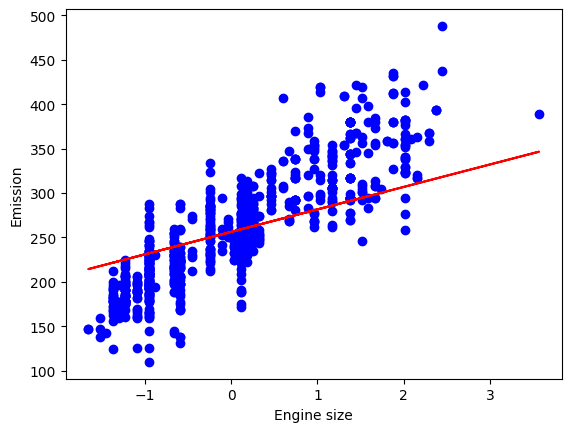

In [17]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

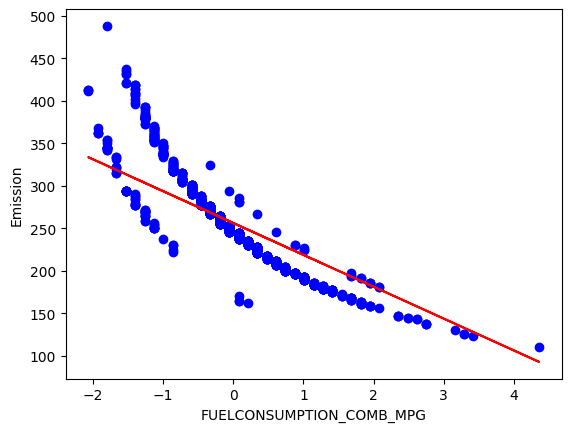

In [18]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()